In [1]:
#loading neccesary libraries

import time  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt


df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Setup complete")

Setup complete


In [2]:
print(df.shape)
df.head().T

(1470, 35)


,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [3]:
#We have 35 columns from these there are various columns which are good features to predict employee attrition
#We will conduct EDA and iterate through alll of these features and understand the data in depth 

#First we will go about finding null values and droping duoplicates if any and we will see the data structures to 
#understand the data and make changes where neccesary

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Checking for null values 
df.isnull().sum()
df.duplicated().sum()
#We have no duplicates or null values present in the data

0

# Objectives :
* Predicting Employee Attrition
* Identifying the characterstics of employees with higher attrition rats

## Cleaning & Preparation

Some categorical columns have been converted to numerical we will convert them to categorical features for EDA

Data Wrangling by Inspecting numerical and categorical features and dropping unnecessary features 

## EDA

Finding the features that has higher attrition rates by plotting proportions within the features and finding attrition of elements in that feature conducting EDA only on those feature

Univariate analysis : histogram of numberical features and count plots to understand proportions of categorical features

Bivariate analysis  : grouped histogram,scatterplot between numerical features 

# Finalizing and building Models

We will convert features in the format required to build models 

We will run different models and validate those model and select the best performing model




In [5]:
clist=[col for col in df.columns if df[col].dtype=="int64" and df[col].nunique() <= 5]

df.loc[:,clist].nunique()

Education                   5
EmployeeCount               1
EnvironmentSatisfaction     4
JobInvolvement              4
JobLevel                    5
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
StandardHours               1
StockOptionLevel            4
WorkLifeBalance             4
dtype: int64

In [6]:
#The convertion is  based on assumption that from 1:5 1 is loweest and 5 is highest
data=df
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",
                                           4:"Senior Level",5:"Executive Level"})
df=data

In [7]:
df.describe().T
#Employee count and standard hours have 0 standard deviation indicating all the elements present are same
#Employee number is unique field these must be dropped


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [8]:
df.describe(include="O").T
#ALl emplloyees are over 18 most of the features in perforance rating is excellent 
#The attrition data is unbalanced 

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [9]:
columns_to_drop=["EmployeeCount","EmployeeNumber","StandardHours","Over18"]
df.drop(columns=columns_to_drop,inplace=True)

In [10]:
#For ease of anlaysis and time we are going to plot a countplot of attrition # and for each categorical or numerical column
#with less than 10 unique values we will create count plots
categorical_cols_less =[col for col in df.columns if df[col].dtype=="object" and df[col].nunique() < 10]
categorical_cols_less.remove("Attrition")

In [11]:
len(categorical_cols_less)

15

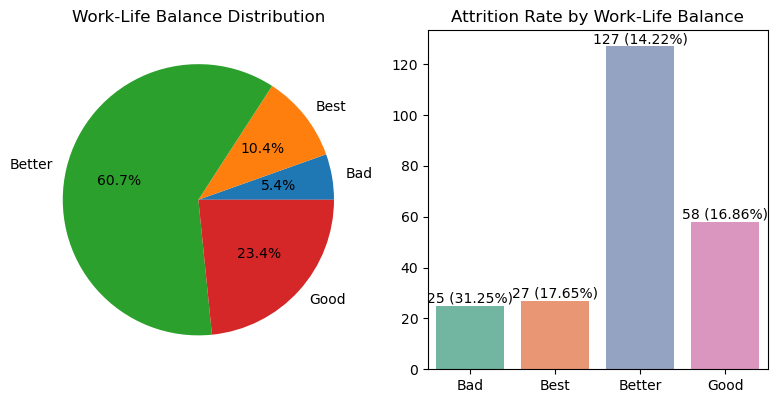

In [12]:

plt.figure(figsize=(8, 4))

value_counts = df["WorkLifeBalance"].value_counts().sort_index()

# Create a pie chart to show the distribution of WorkLifeBalance

plt.subplot(1,2,1)
plt.pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
plt.title("Work-Life Balance Distribution")
#plt.show()

# Filter the DataFrame for Attrition == 'Yes'
new_df = df[df["Attrition"] == 'Yes']

# Calculate value counts for the filtered data
value_2 = new_df["WorkLifeBalance"].value_counts().sort_index()

# Calculate percentages based on the counts
percentage = round((value_2 / value_counts) * 100, 2)  # Round the percentages to two decimal places

# Create a bar plot
plt.subplot(1,2,2)
bar = sn.barplot(x=value_2.index, y=value_2.values, palette='Set2')

# Add labels to the bars showing counts and percentages
for index, value in enumerate(value_2):
    per=percentage[index]
    bar.text(index, value, f'{value} ({per}%)', ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.title("Attrition Rate by Work-Life Balance")
plt.show()

# ! Inference
60.7% of employees thinks they have better work life balance 
The highest attrition rate is by employees who ratied work life balance as  Bad and is only 5%

In [13]:
def plot_piebar(col):
    plt.figure(figsize=(14, 6))
    value_counts = df[col].value_counts().sort_index()

    # Create a pie chart to show the distribution of WorkLifeBalance

    plt.subplot(1,2,1)
    plt.pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
    plt.title(f"{col} Distribution")
    #plt.show()

    # Filter the DataFrame for Attrition == 'Yes'
    new_df = df[df["Attrition"] == 'Yes']

    # Calculate value counts for the filtered data
    value_2 = new_df[col].value_counts().sort_index()

    # Calculate percentages based on the counts
    percentage = round((value_2 / value_counts) * 100, 2)  # Round the percentages to two decimal places

    # Create a bar plot
    plt.subplot(1,2,2)
    bar = sn.barplot(x=value_2.index, y=value_2.values, palette='Set2')

    # Add labels to the bars showing counts and percentages
    for index, value in enumerate(value_2):
        per=percentage[index]
        bar.text(index, value, f'{value} ({per}%)', ha="center", va="bottom", fontsize=10)


    plt.title(f"Attrition Rate by {col}")
    plt.show()

In [14]:
vals=[col for col in df.columns if df[col].dtype=="object"]
vals.remove("Attrition")    

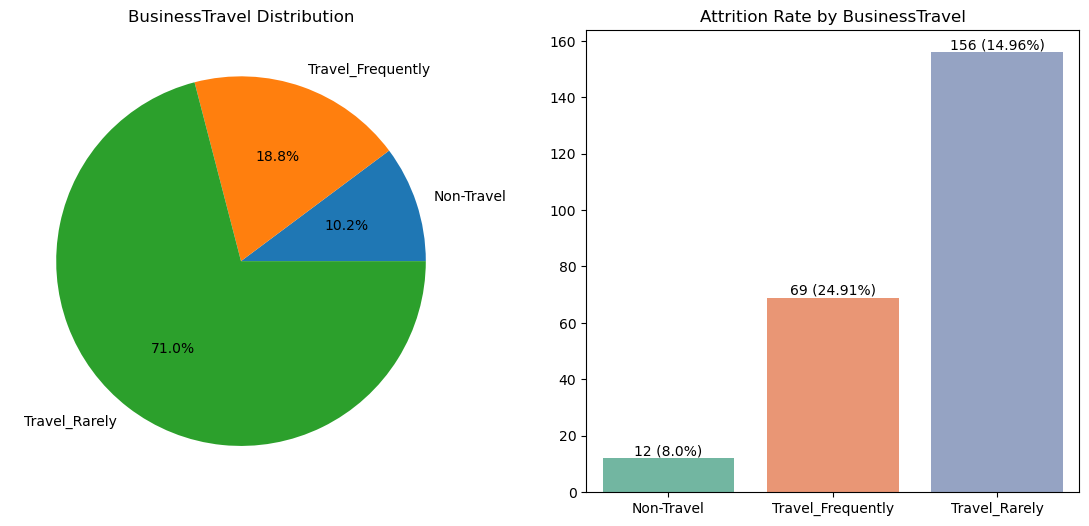

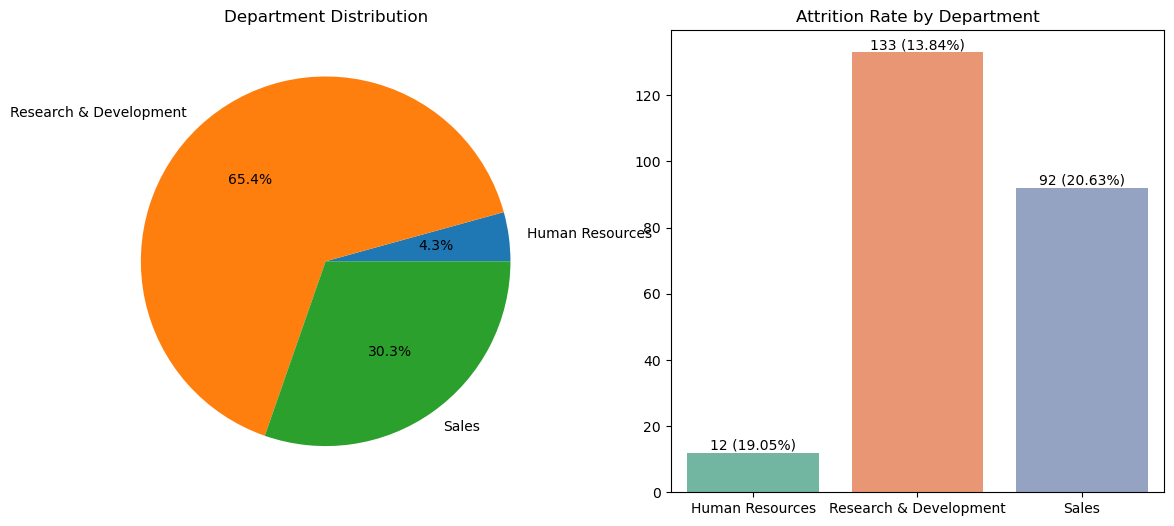

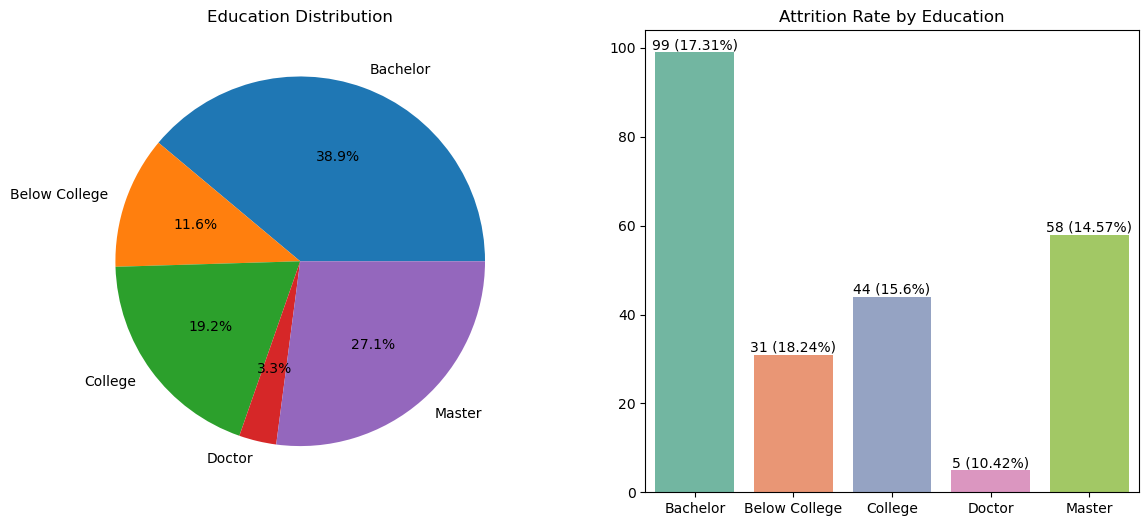

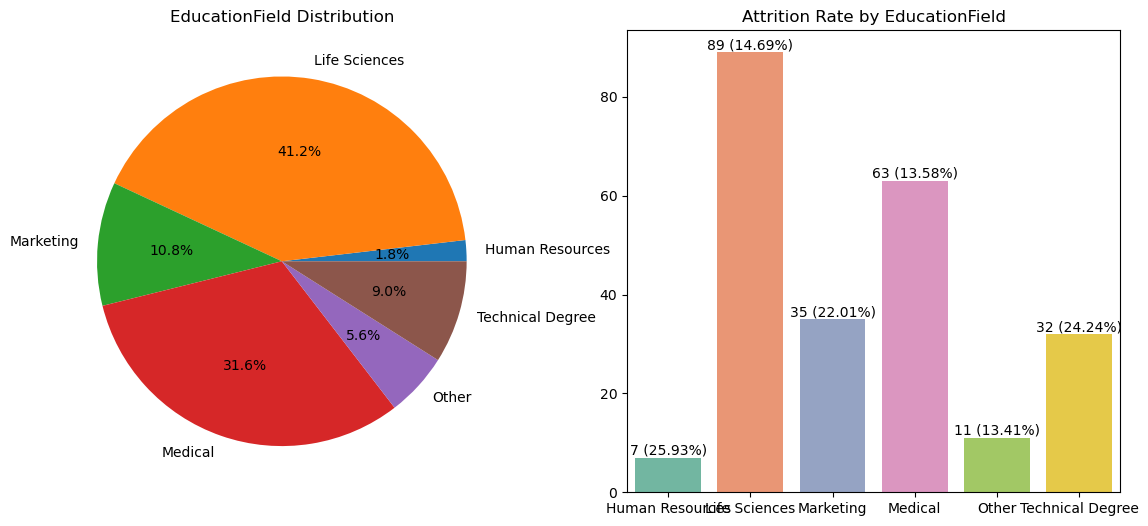

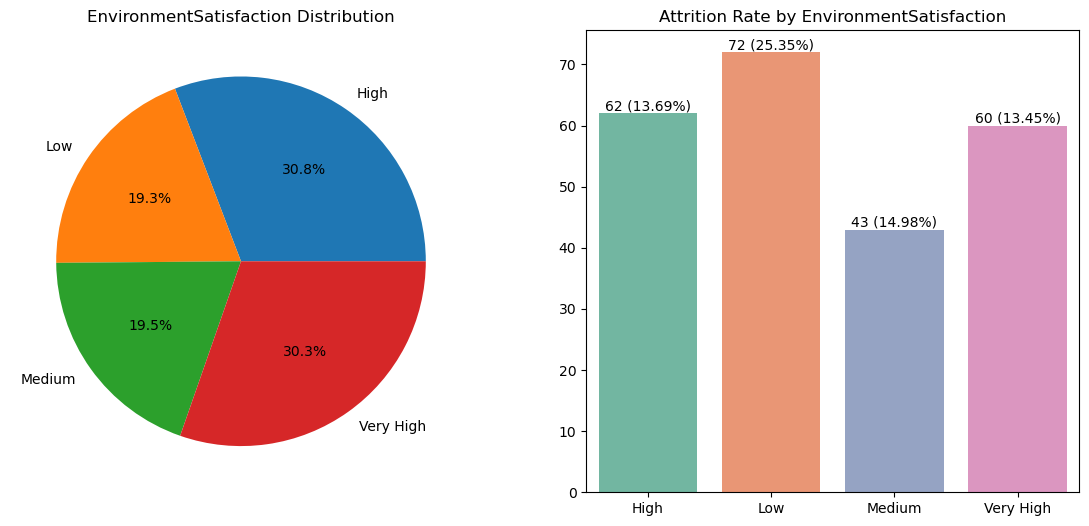

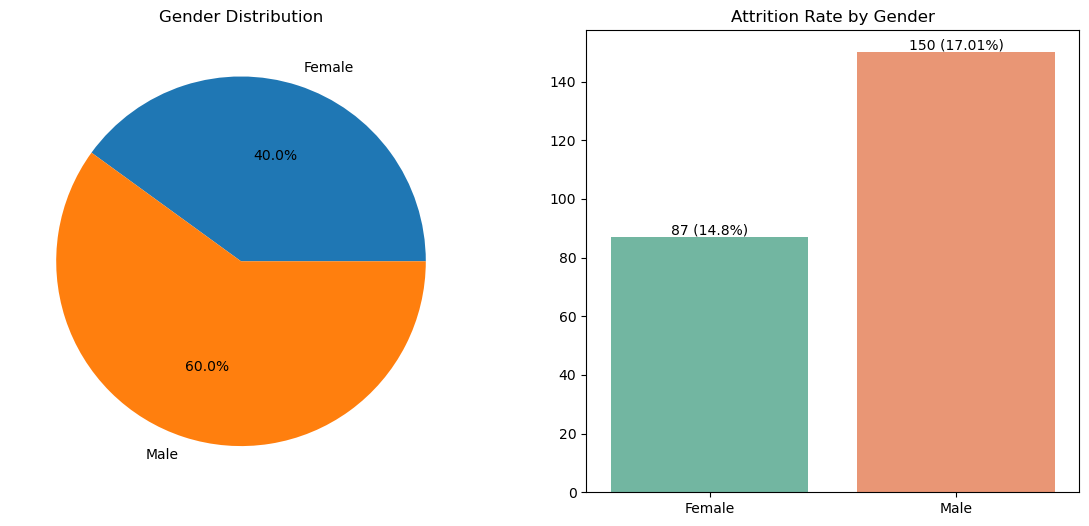

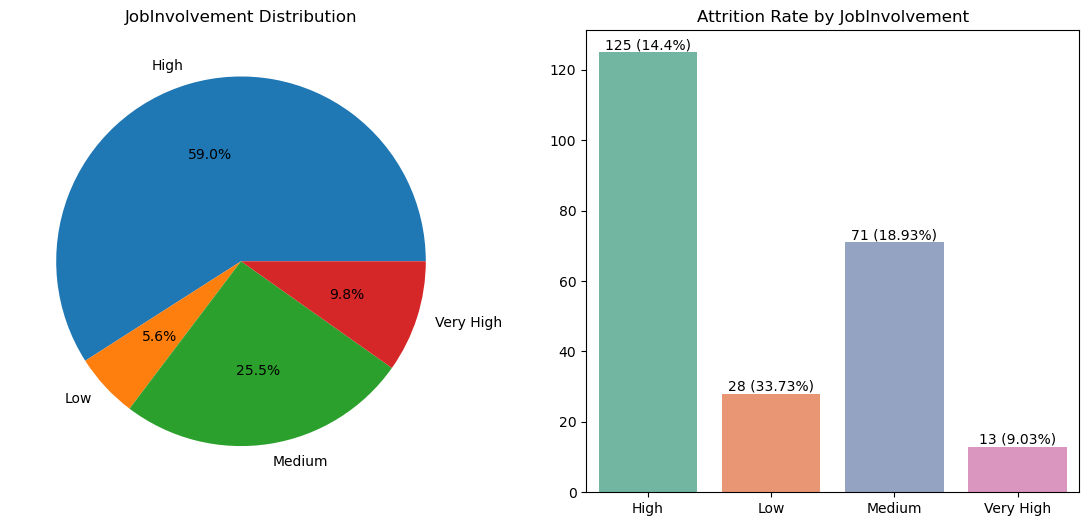

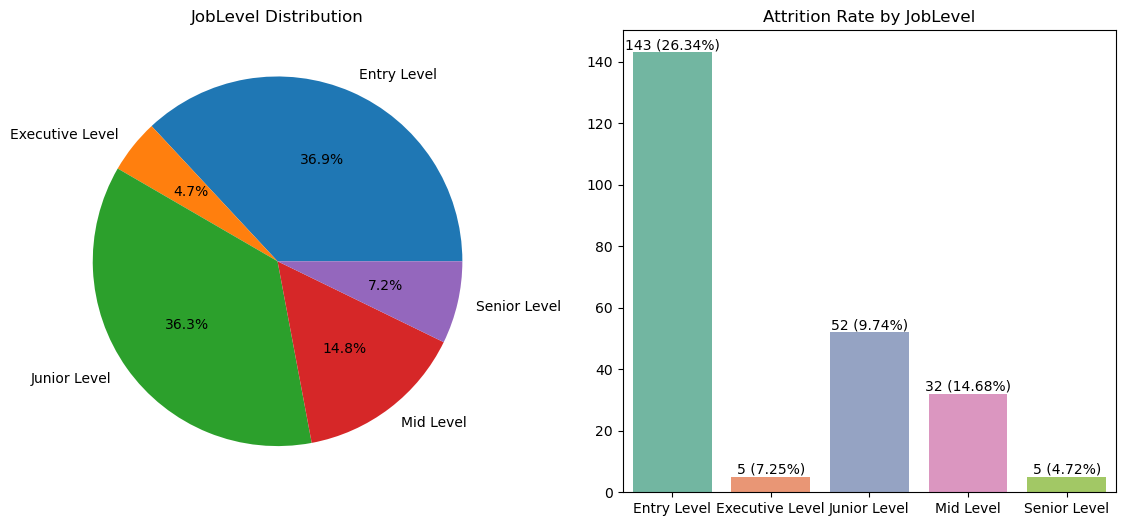

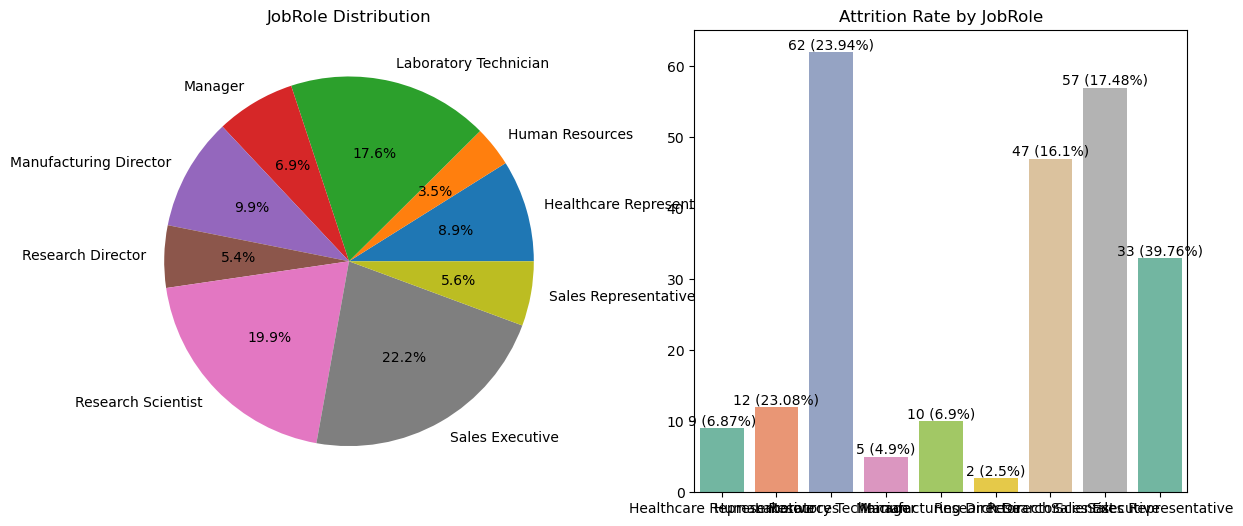

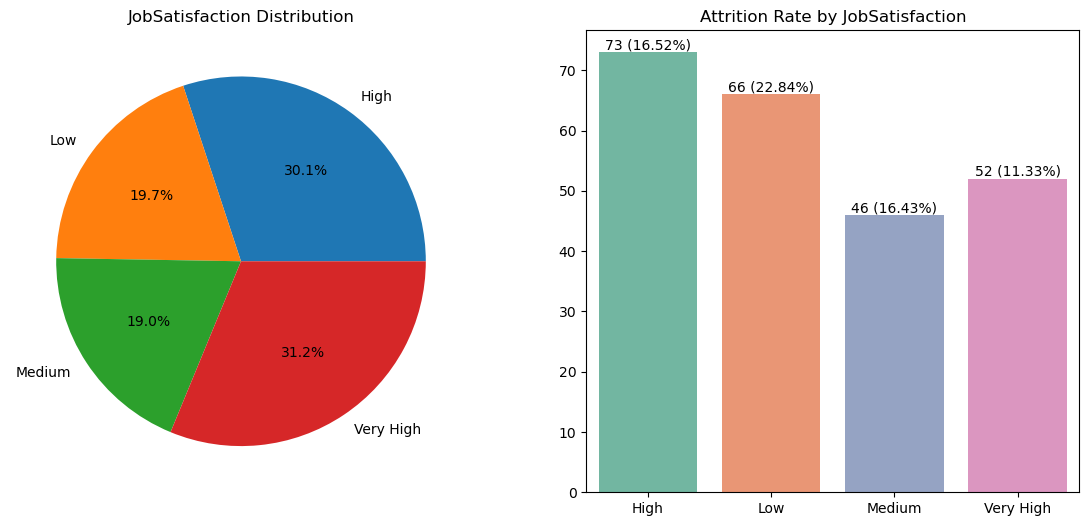

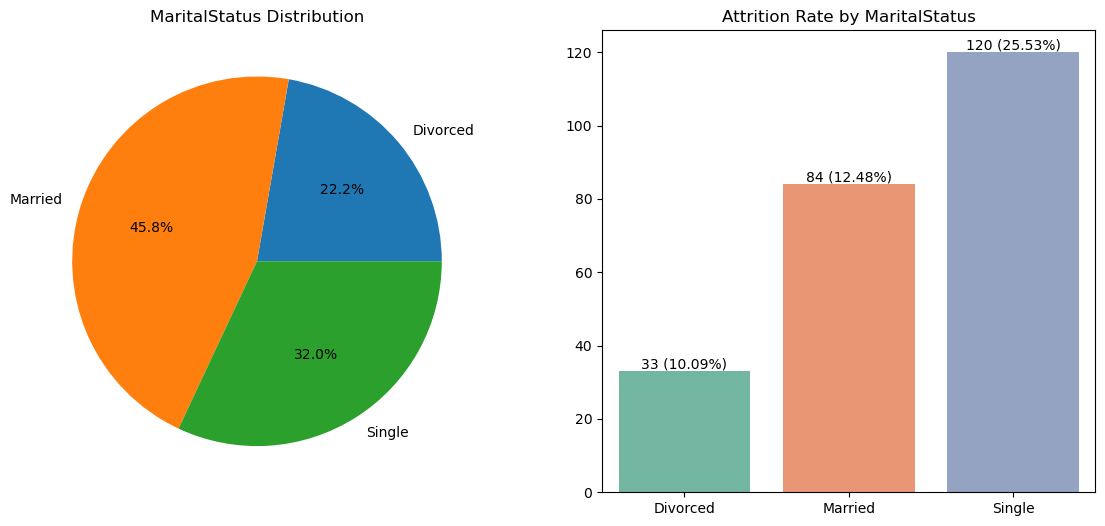

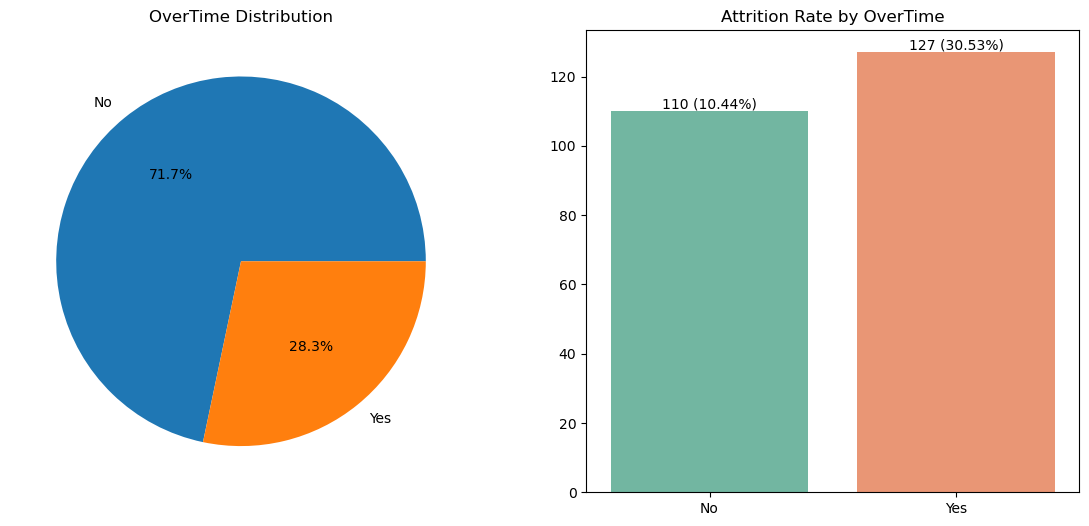

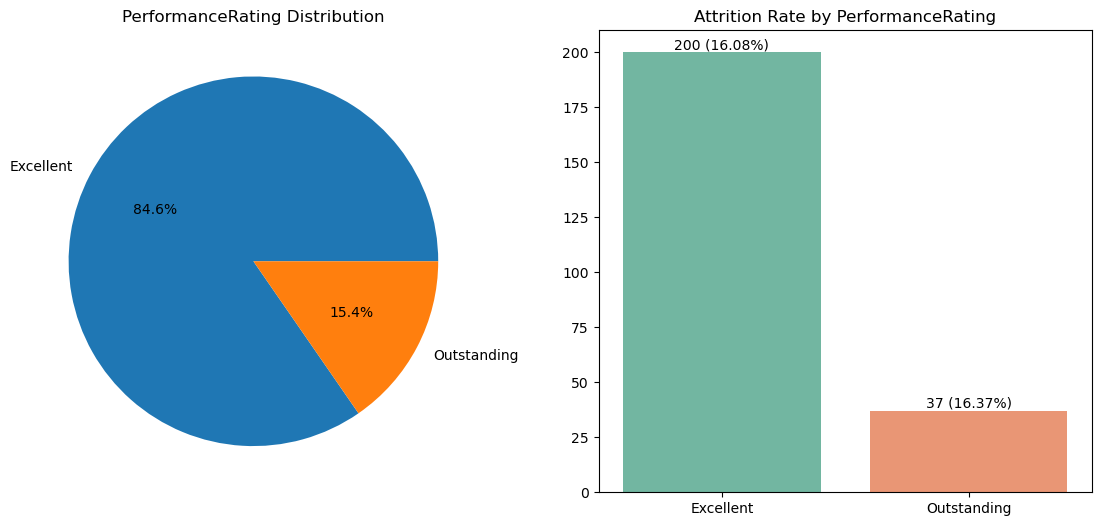

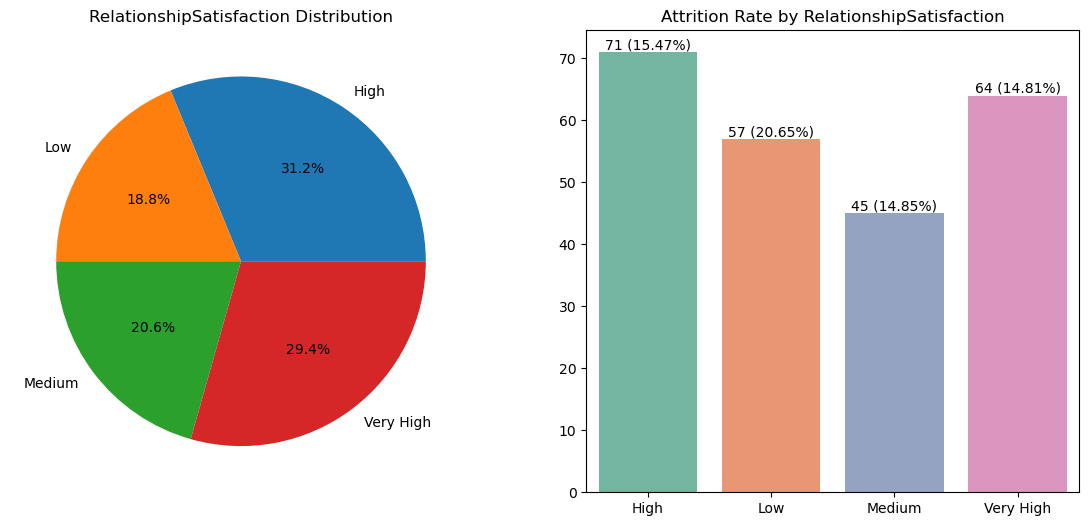

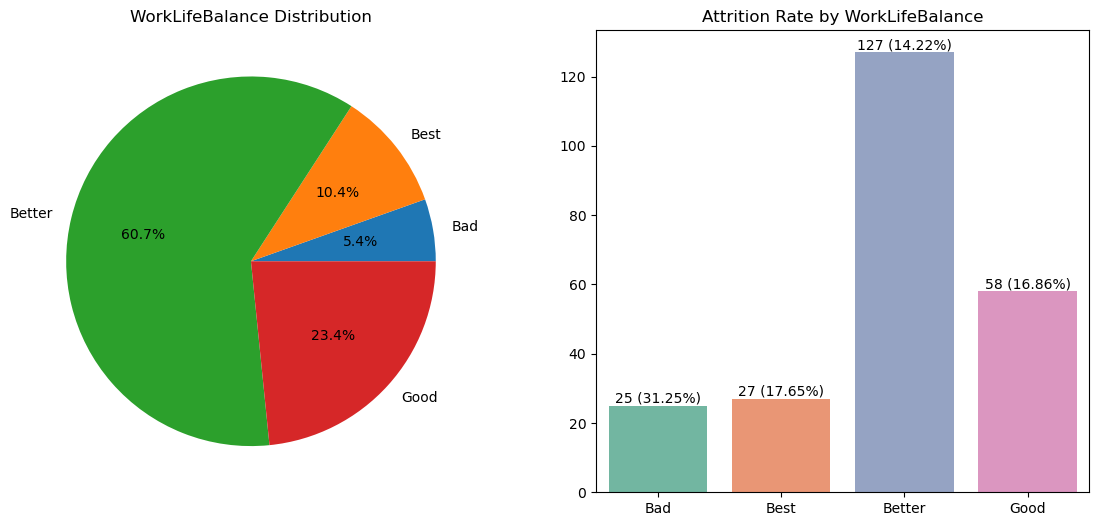

In [15]:
for i in vals:
    plot_piebar(i)

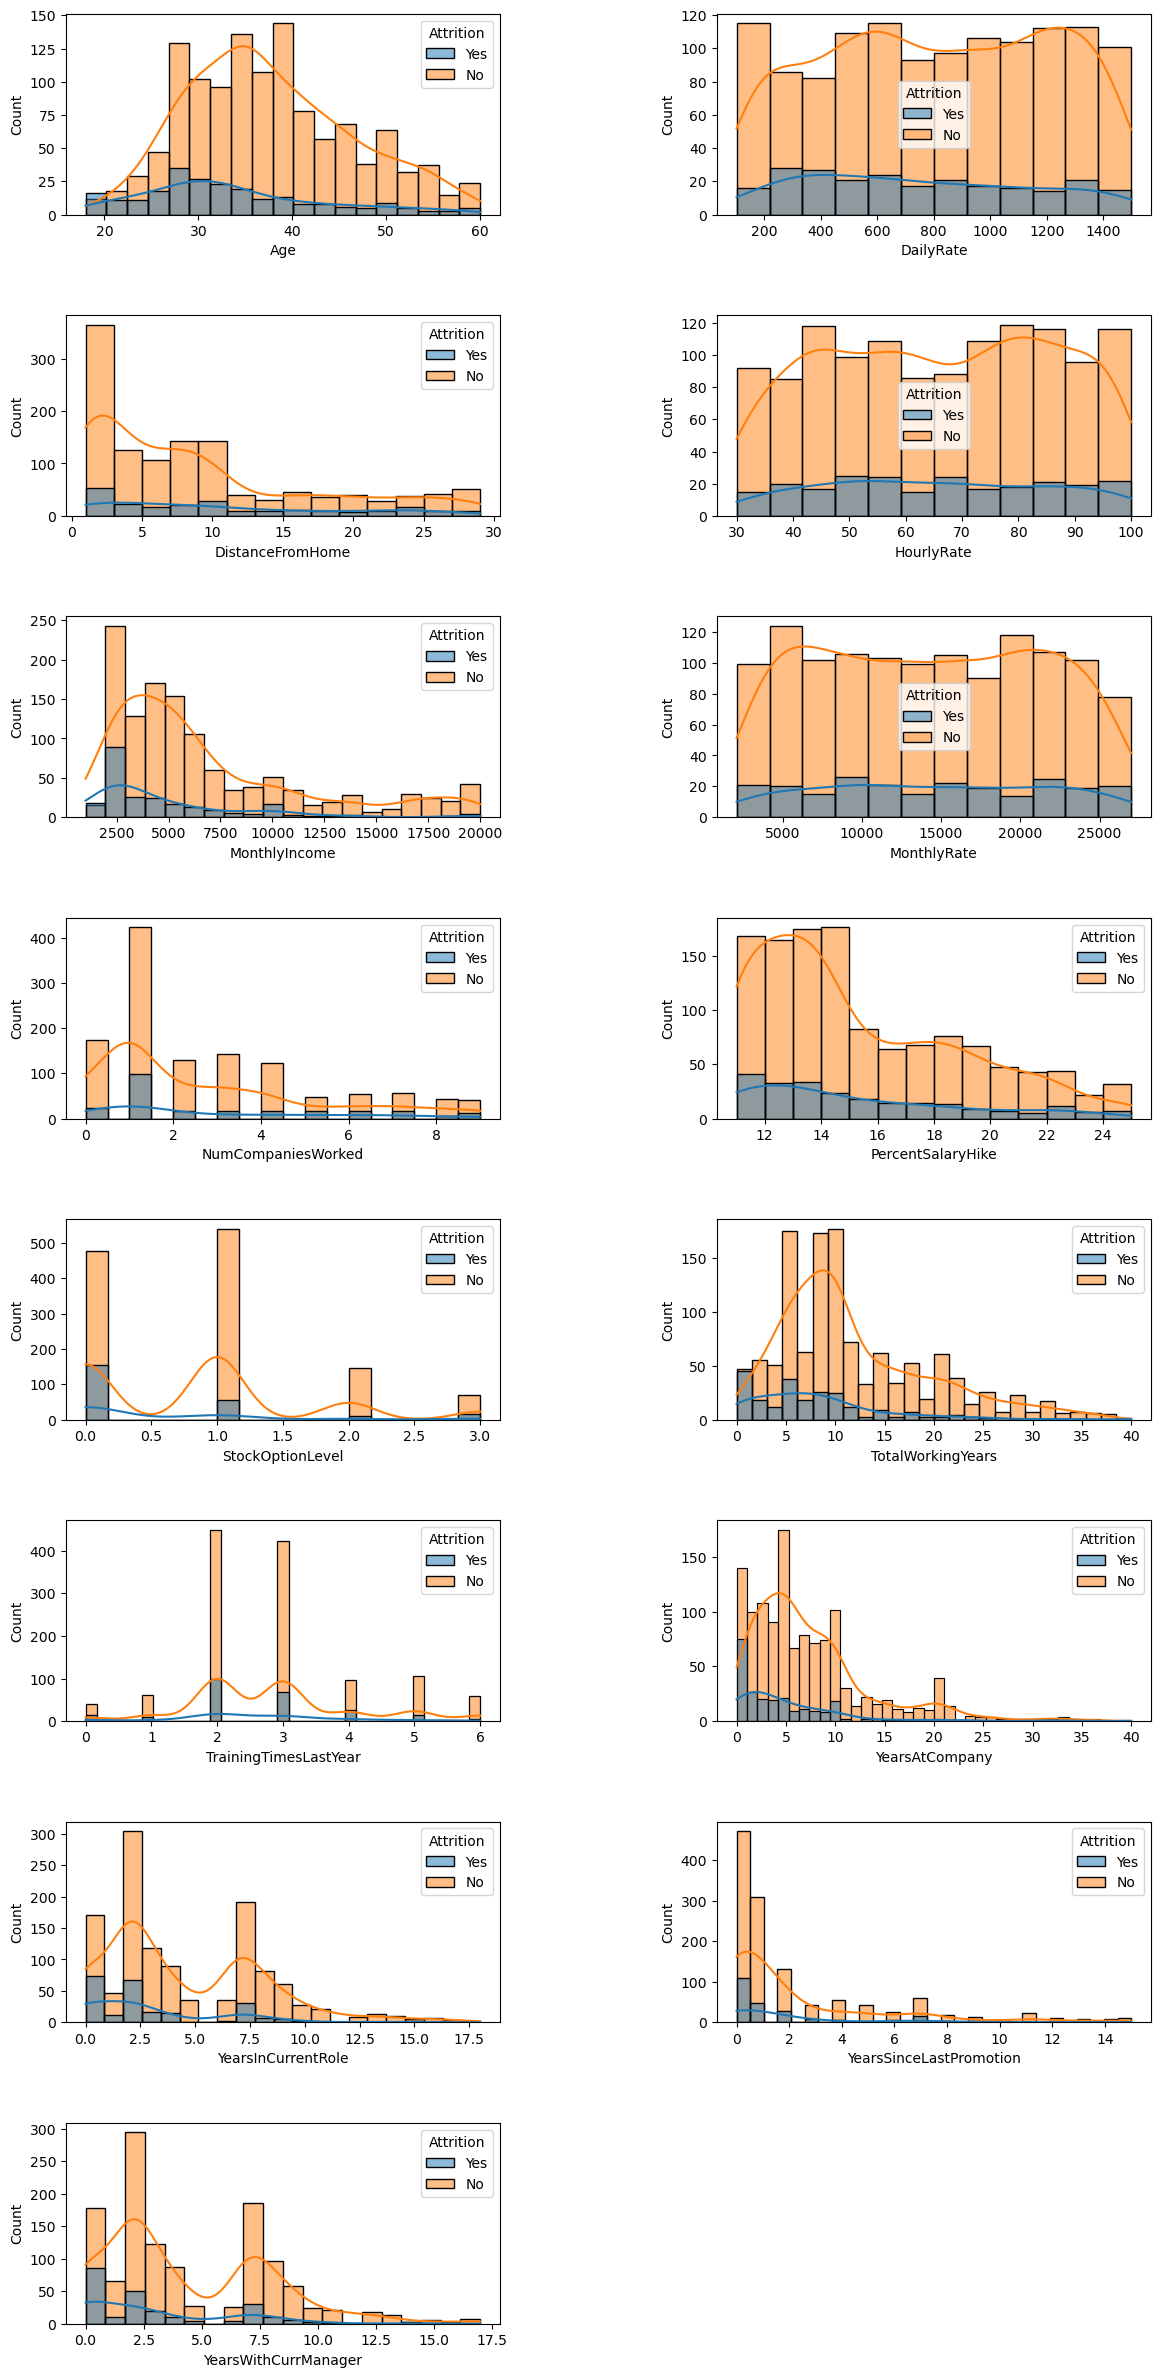

In [16]:
numerical_cols = [col for col in df.columns if df[col].dtype=="int64"]
plt.figure(figsize=(14,30))
for i,values in enumerate(numerical_cols):
    plt.subplot(8,2,i+1)
    sn.histplot(data=df,x=values,hue="Attrition",kde=True)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

In [17]:
len(numerical_cols)

15

In [18]:
def hist_box(col):    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sn.histplot(data=df,x=col,hue="Attrition",kde=True)
    plt.title(f"Distribution by {col} & atttrition Histograms", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    sn.boxplot(data=df,x="Attrition",y=col,hue="Attrition")
    plt.title(f"Distribution by {col} & atttrition boxplots", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

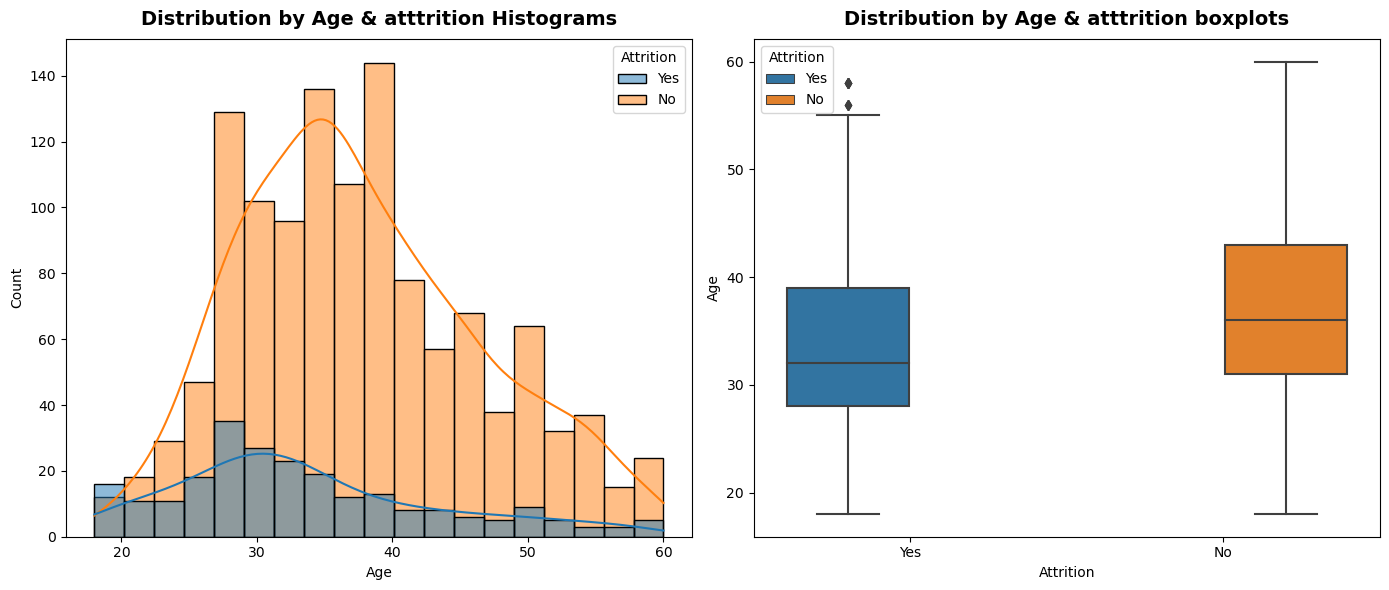

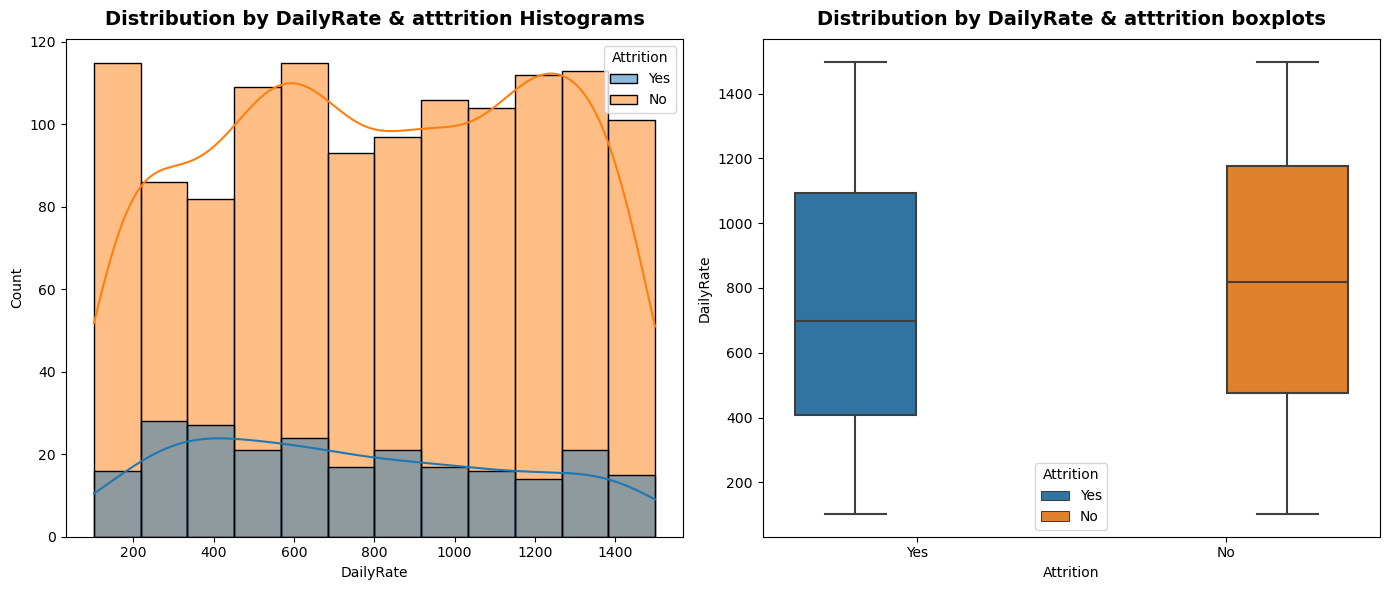

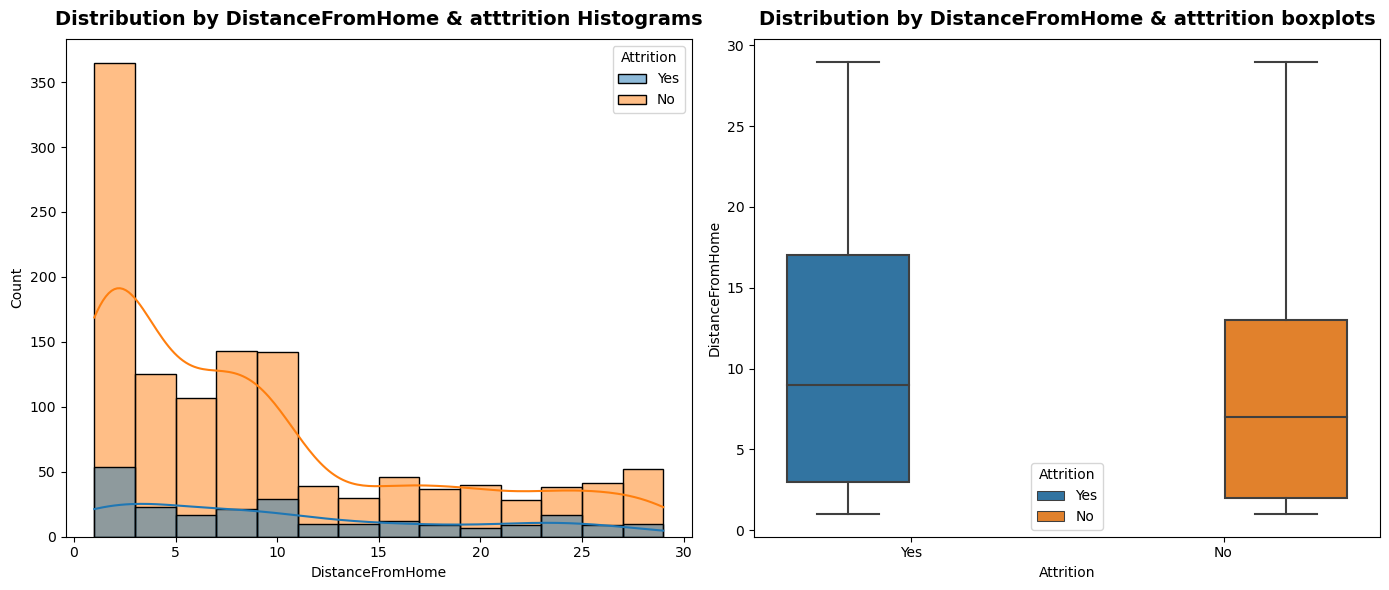

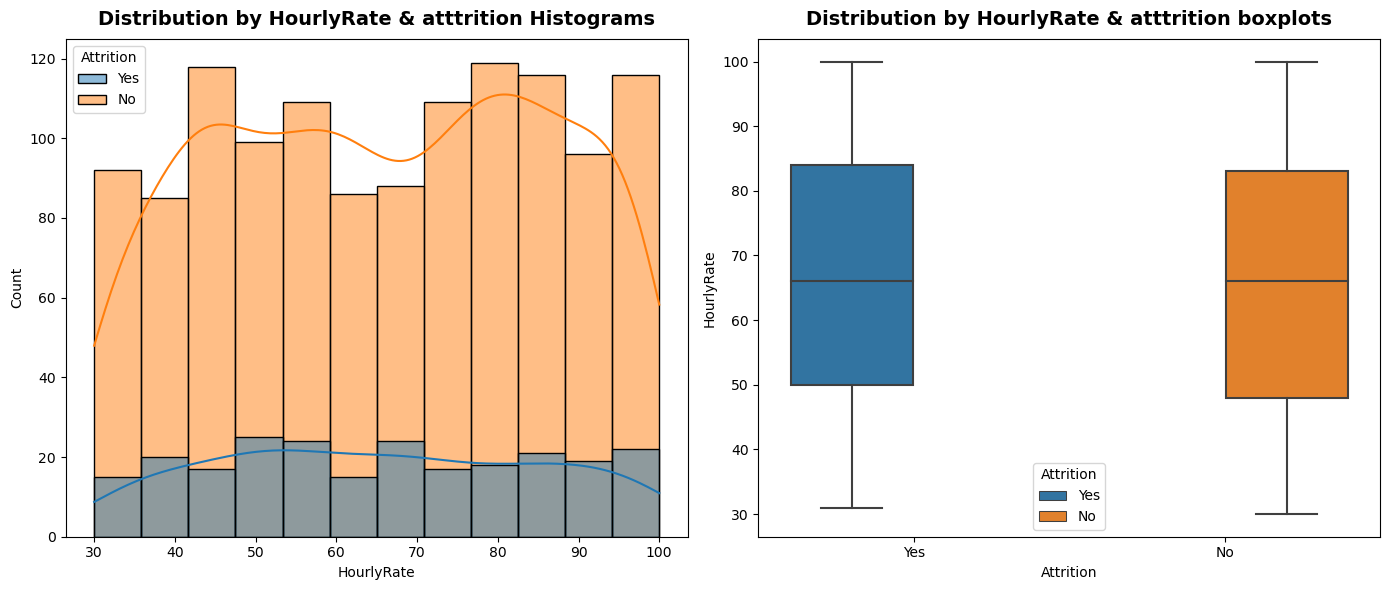

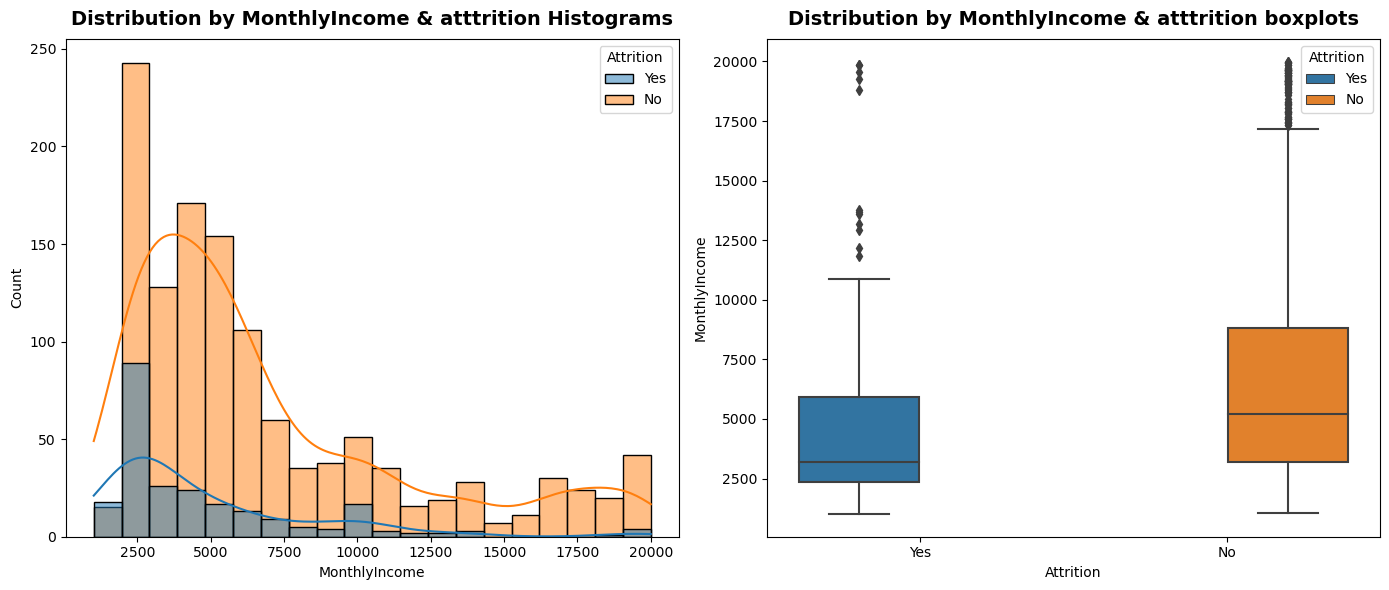

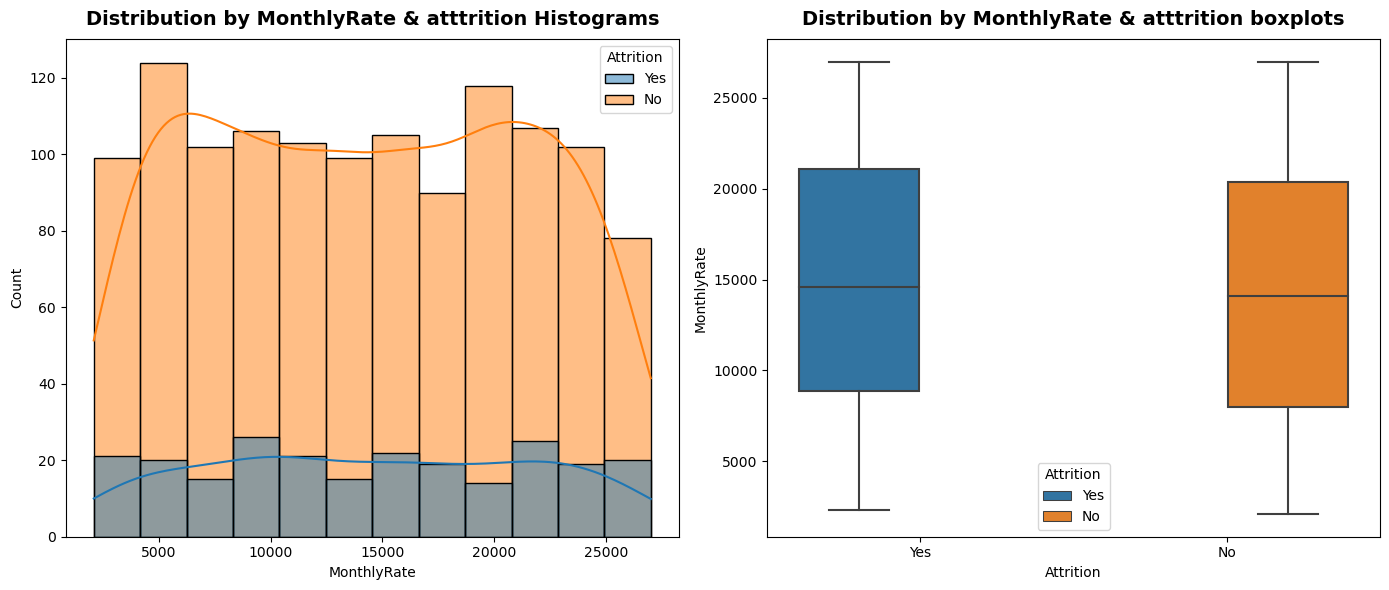

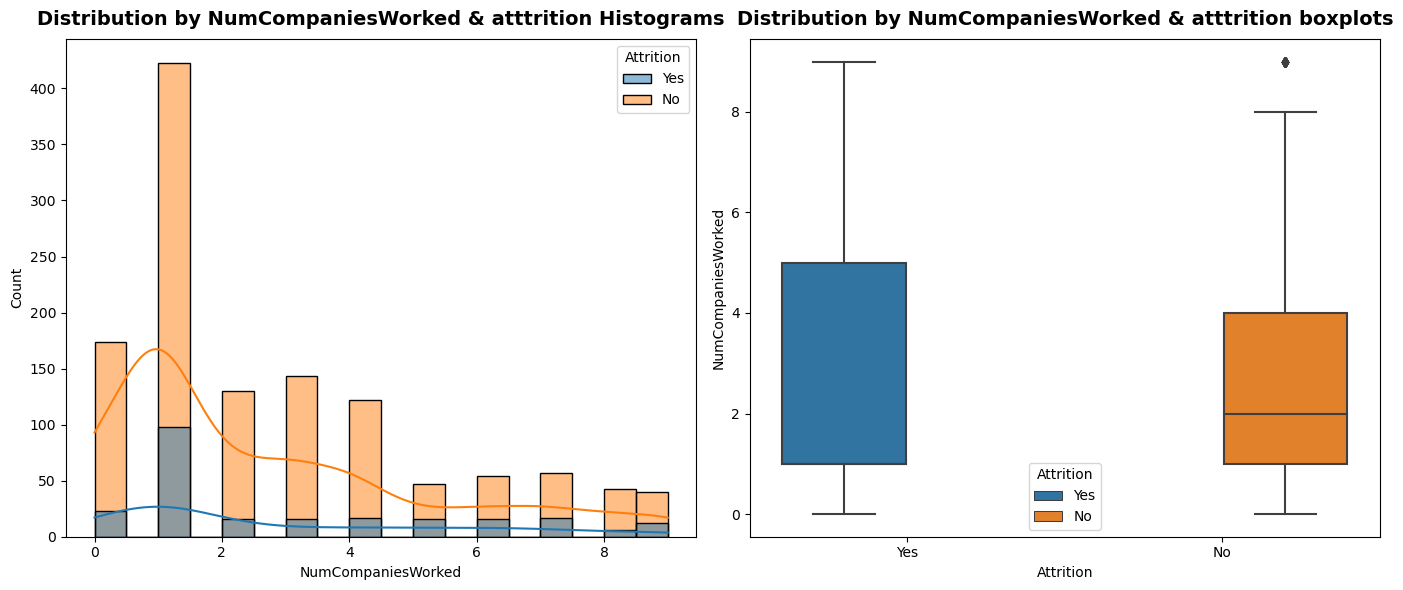

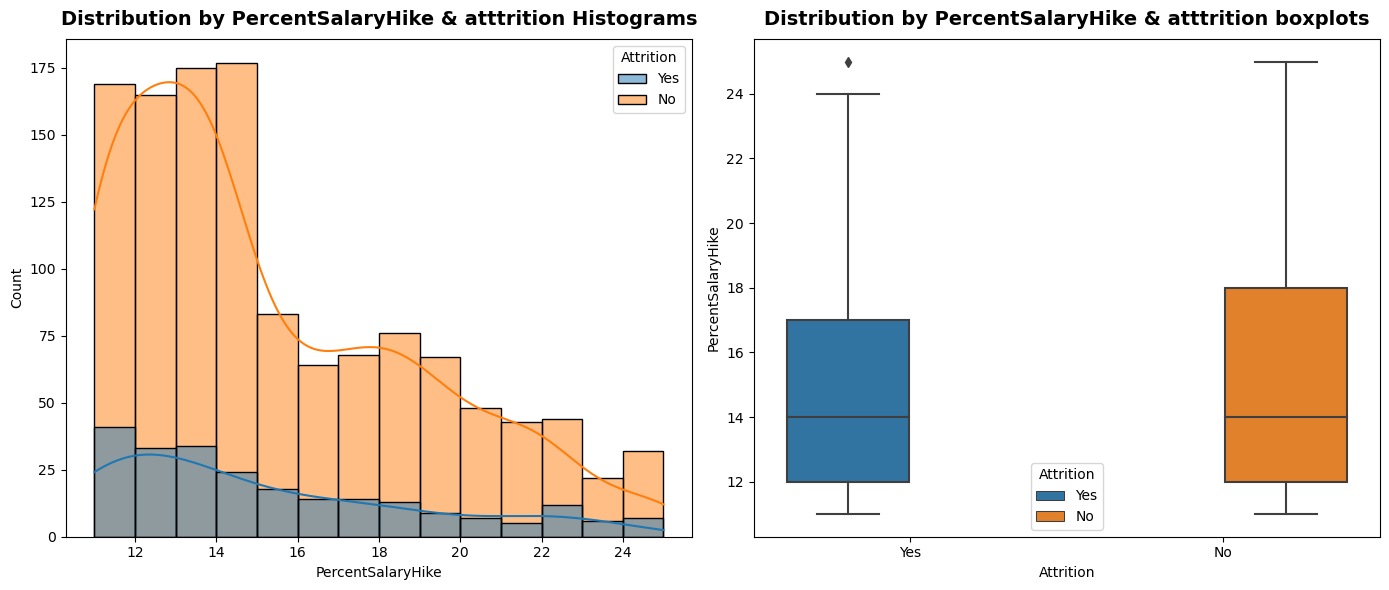

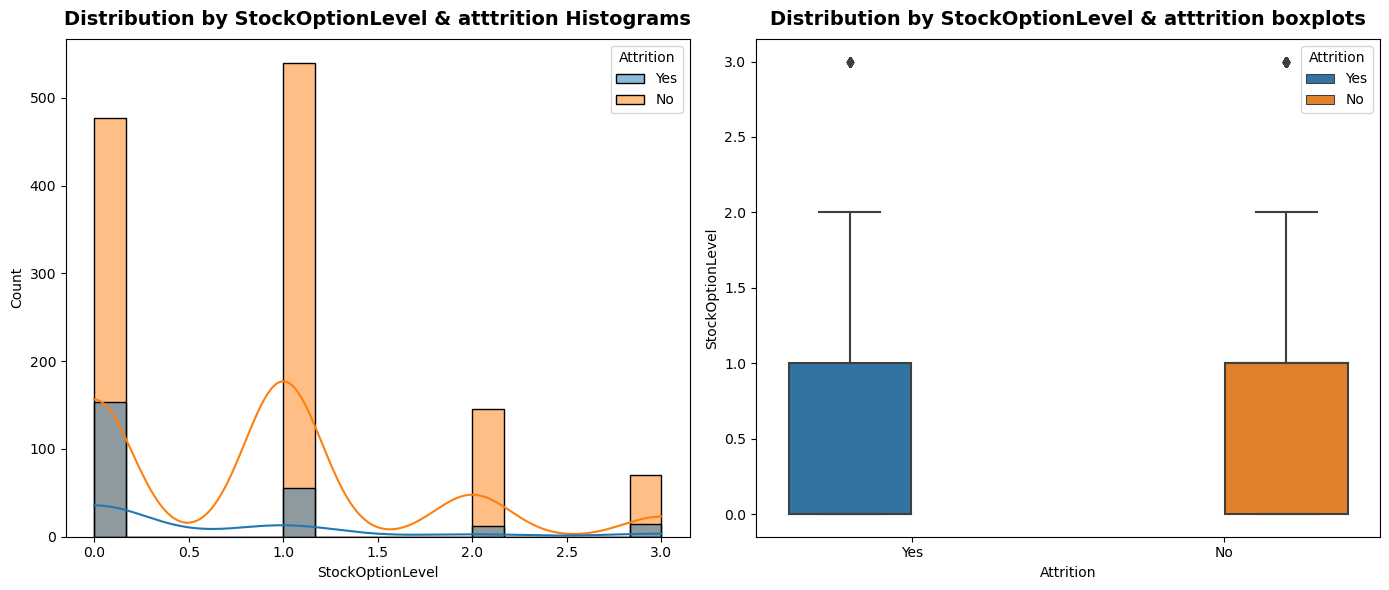

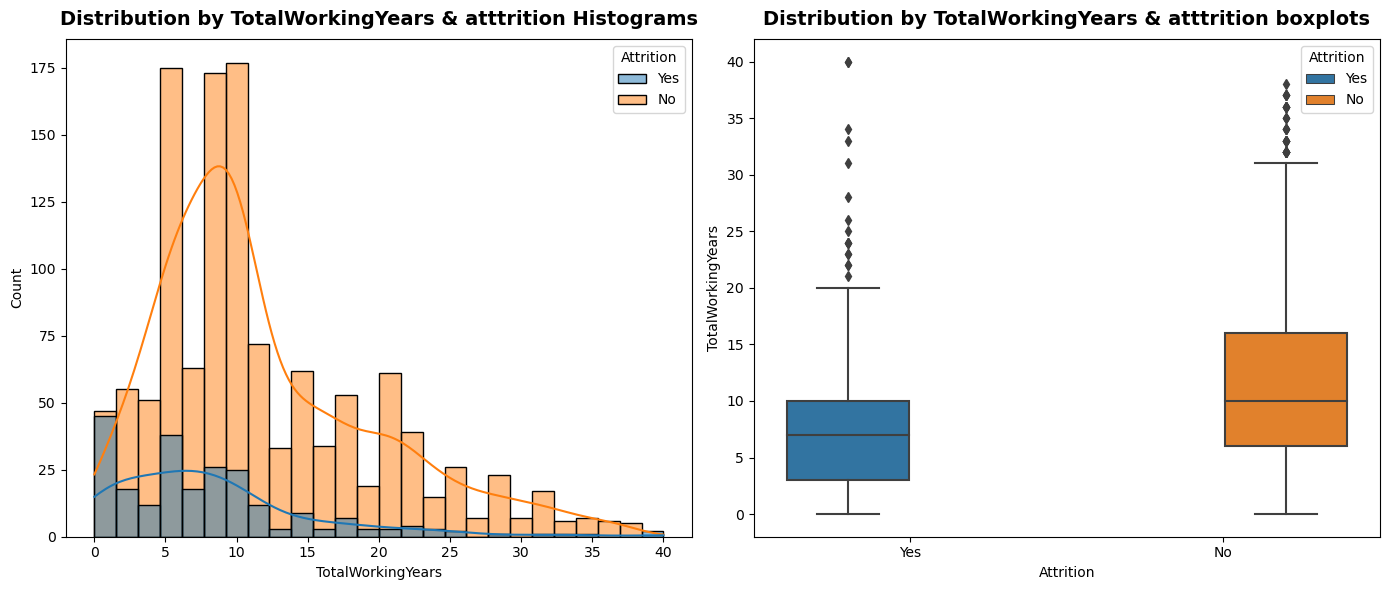

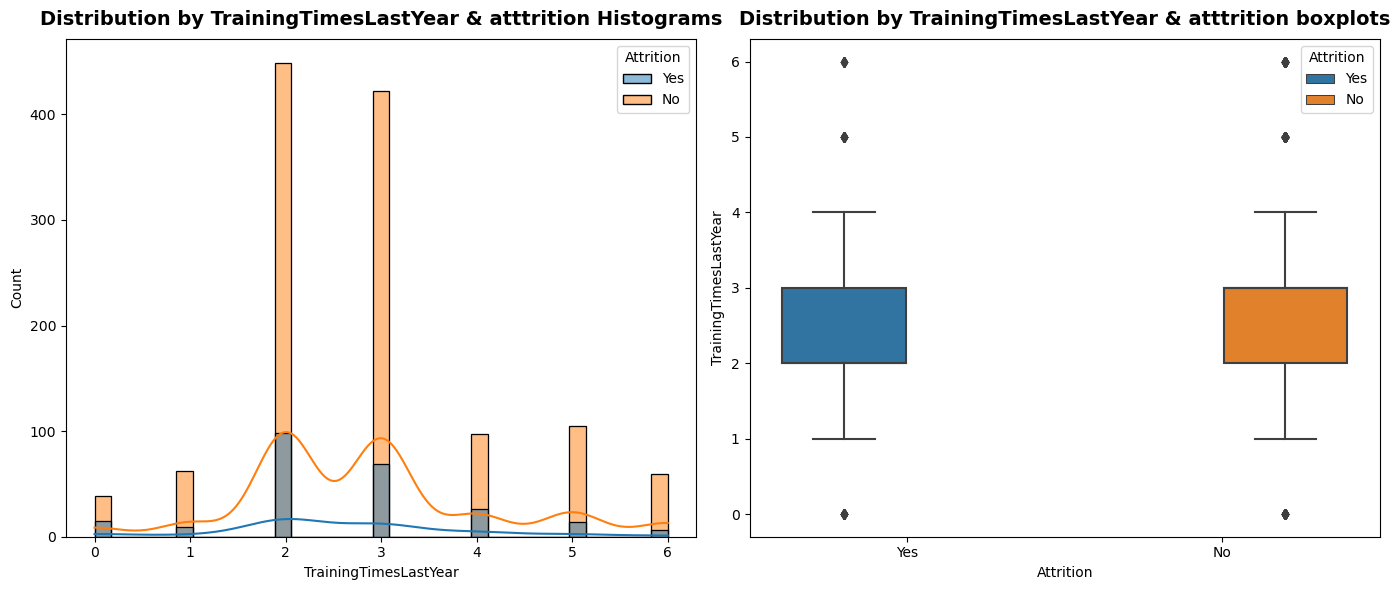

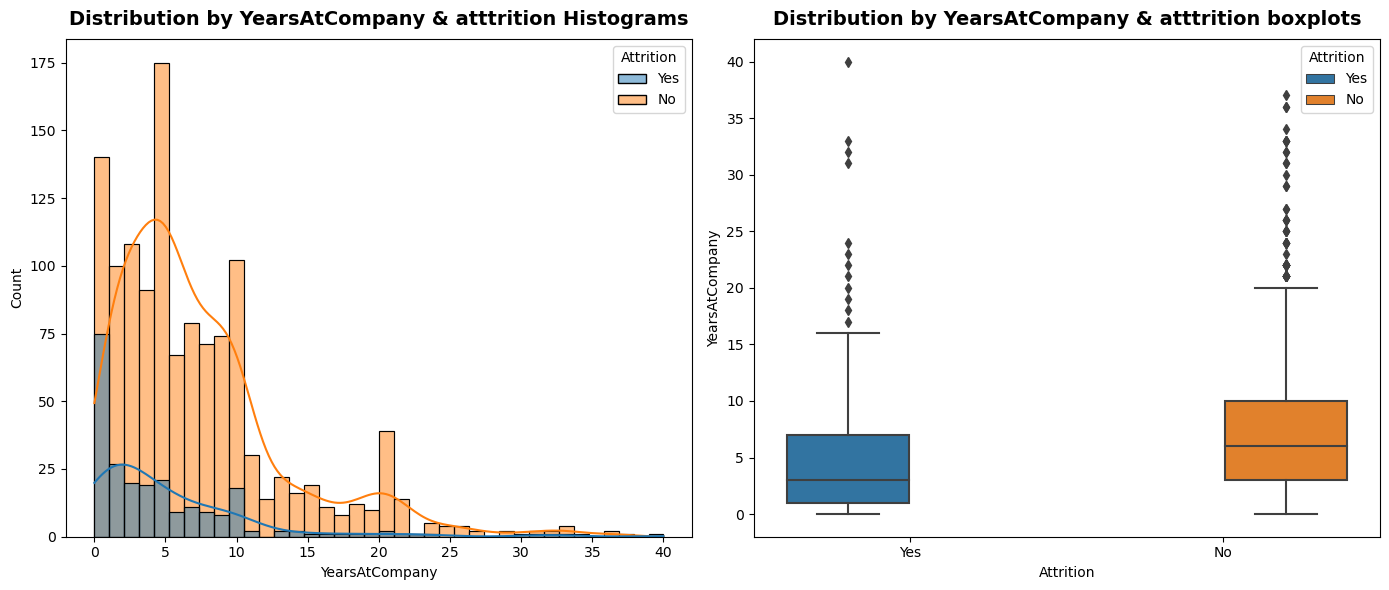

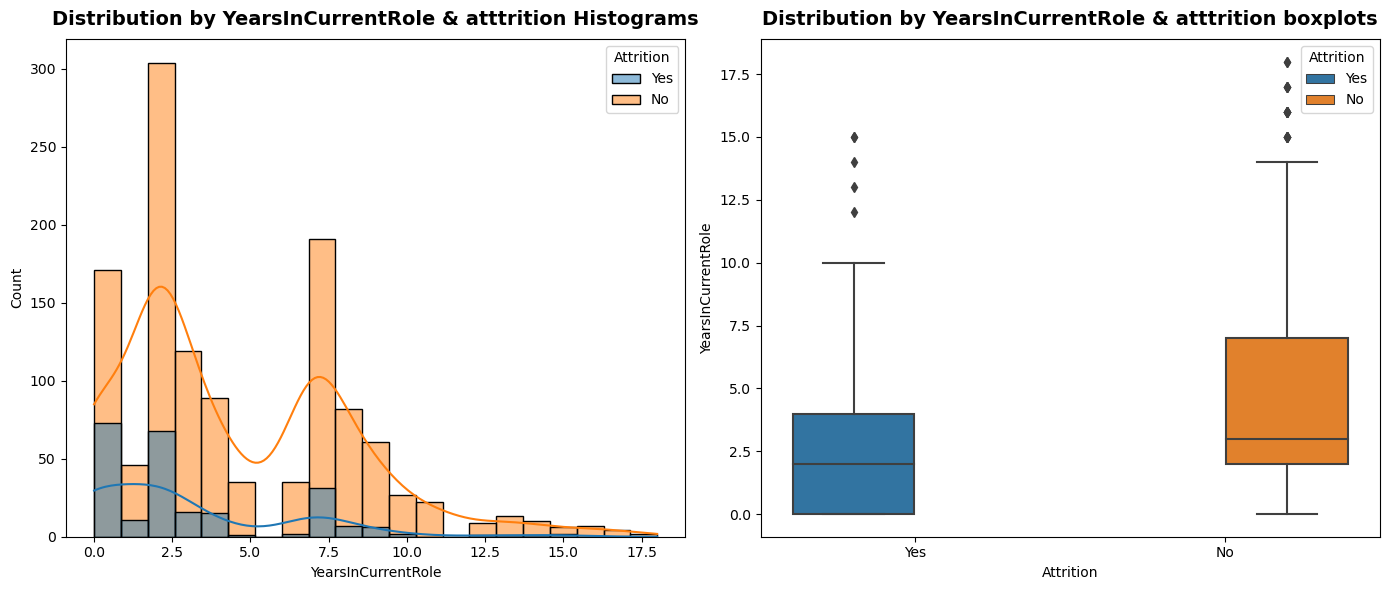

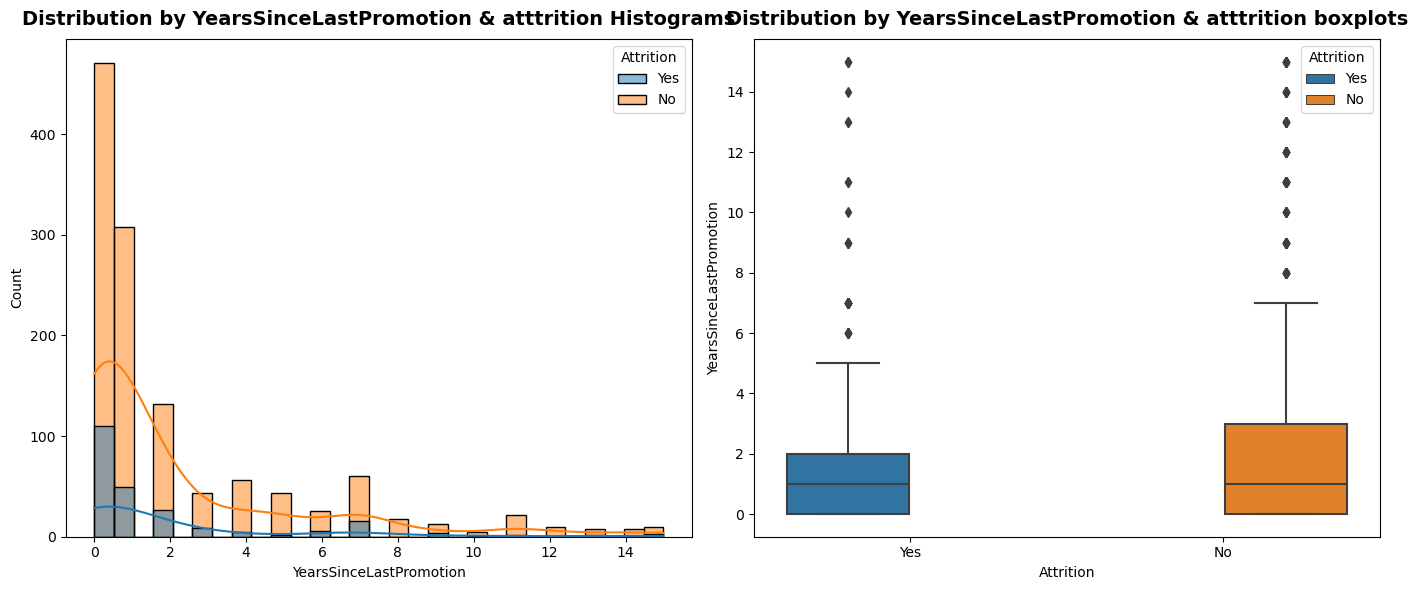

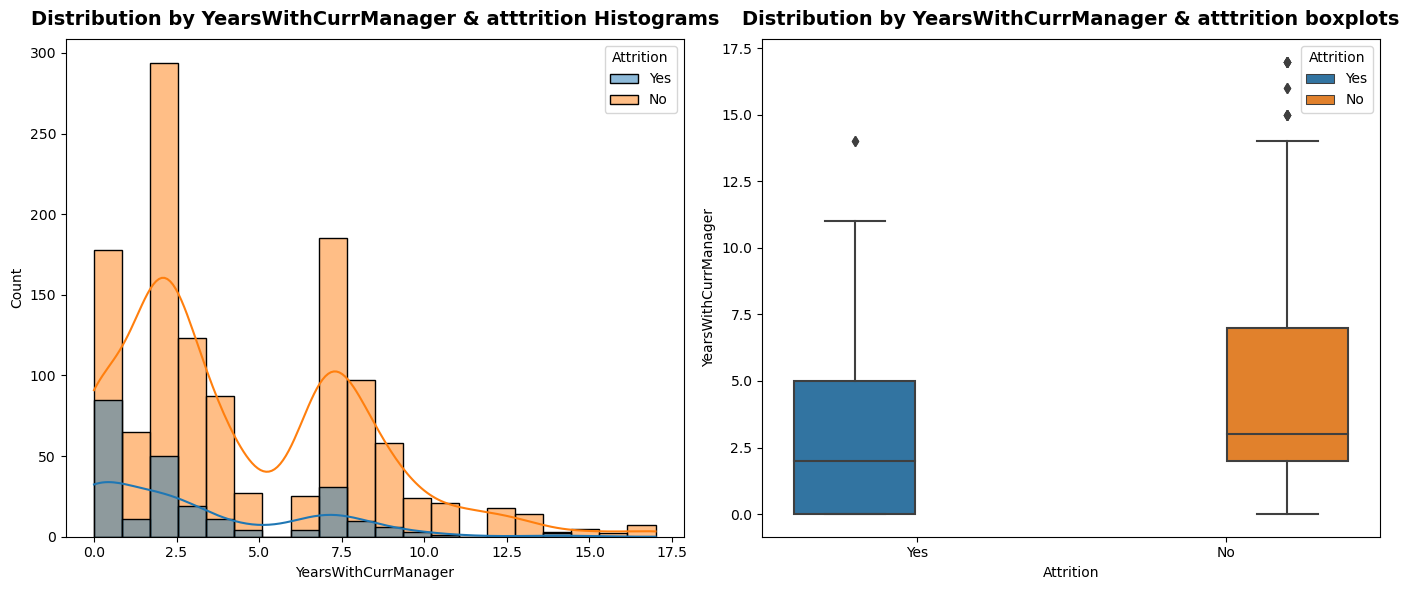

In [19]:
for i in numerical_cols:    
    hist_box(i)

There are few ouliers in the data evne thought decision tree and random forest models won't get influenced by ouliers logistic regression gets affected by ouliers to a large extend so its generally a good practice to remove outliers from the data 

And interms of scaling the data we will  use scaled and non scaled data for logistic regressio  but not for rf and decision tree
